In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv('data.csv')
data.head()

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


In [3]:
data.shape

(15, 2)

In [4]:
print(f"ptp of height : {np.ptp(data.Height)}")
print(f"ptp of Weight : {np.ptp(data.Weight)}")

ptp of height : 0.3600000000000001
ptp of Weight : 22.249999999999993


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  15 non-null     float64
 1   Weight  15 non-null     float64
dtypes: float64(2)
memory usage: 368.0 bytes


In [6]:
X=data.drop(columns='Weight')
Y=data['Weight']

In [7]:
X.head()

,Height
0,1.47
1,1.50
2,1.52
3,1.55
4,1.57


In [8]:
Y.head()

0    52.21
1    53.12
2    54.48
3    55.84
4    57.20
Name: Weight, dtype: float64

Text(0.5, 1.0, 'Height /feature')

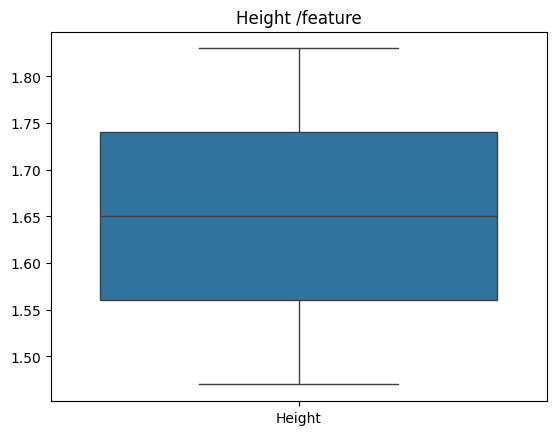

In [9]:
sns.boxplot(X)
plt.title("Height /feature")

Text(0.5, 1.0, 'Weight/target')

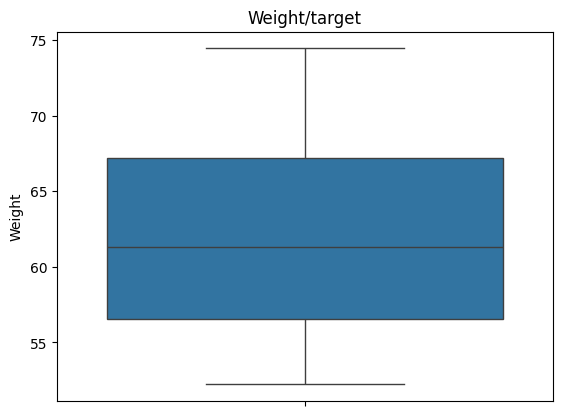

In [10]:
sns.boxplot(Y)
plt.title("Weight/target")

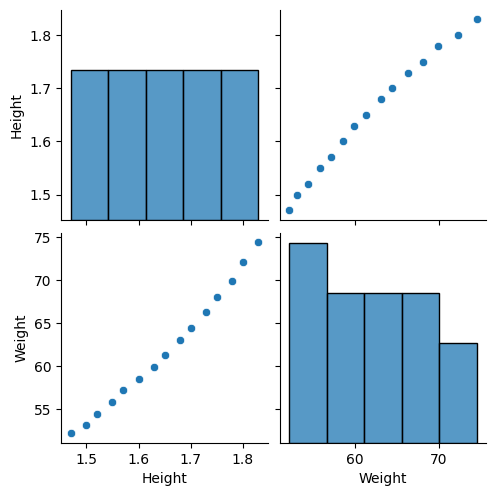

In [11]:
sns.pairplot(data)

In [12]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=12)

In [13]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 5 to 11
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  12 non-null     float64
dtypes: float64(1)
memory usage: 192.0 bytes


In [14]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 12 entries, 5 to 11
Series name: Weight
Non-Null Count  Dtype  
--------------  -----  
12 non-null     float64
dtypes: float64(1)
memory usage: 192.0 bytes


In [15]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [16]:
W=model.coef_
b=model.intercept_

In [17]:
def predict(X):
    temp=np.zeros(len(X))
    for i in range(len(X)):
        temp[i]=W*X[i]+b
    return temp


In [18]:
line=predict(data.Height)

In [19]:
print(line)

[51.01339625 52.87400627 54.11441296 55.97502298 57.21542967 59.07603969
 60.93664972 62.17705641 64.03766643 65.27807312 67.13868314 68.37908983
 70.23969985 71.48010654 73.34071656]


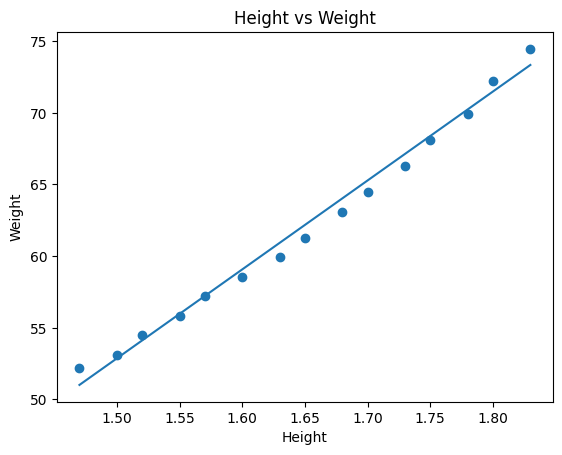

In [20]:
plt.plot(X,line)
plt.scatter(X,Y)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height vs Weight')
plt.show()

In [21]:
y_pred=model.predict(x_test)
y_pred

array([70.23969985, 67.13868314, 64.03766643])

In [22]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test,y_pred)
print(mae)

0.7020164764840521
